<center>

![](https://drive.google.com/uc?export=view&id=1R6EAVE0Ysym-UNtZR-Ze_HcqQLDmH0bd) 
<p> 
College: Engineering and Information Technology <br>
Department: Information Technology <br>
Program: Data Analytics <br>
Academic semester: Fall 2021- 2022 <br>
Data Engineering Project DAT204 <br>
Dr Salam Fraihat <br>
</p></center>

</p></center>

<center>

# **Sales Analysis Project**

</p></center>

*   Maryam Almetnawy 202010914
*   Raghad Yousef 202020278

---






# **FEATURES**


*   Order ID

*   Product
*   Quantity Orderd

*   Price Each
* Order Date
* Purchase Address



# **Description of data:**
Dataset on USA Sales during 2019



# **Extraction Process**
(Full Extraction)




>  ▶ Importing the libraries we are using for the analysis



In [1]:
import pandas as pd
import os


> ▶ Concating all 12 files into a single csv file for easy use 



In [2]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
files=[file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/Sales_Data')]
all_months_data=pd.DataFrame() 
for file in files :
    df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("All_data.csv", index = False)


> ▶ Reading the csv file



In [4]:
DataFrame = pd.read_csv("All_data.csv")
DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
186846,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
186847,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
186848,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"



# **Data Profiling**

*   Analyzing the data to identify errors and missing data.
*   Collecting descriptive statistics.
*   Collecting data types.
*   Performing data quality assessments.
*   Looking for risks of performing joins on the data.
*   Identifying inconsistencies in the format










> ▶ Summary of the dataset



In [5]:
# null values are 186850 entries while 186305 are non-null 
# There is a total of 6 columns and 186850 rows
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB



> ▶Checking for missing values







In [6]:
nan_df = DataFrame.isnull().sum()
nan_df
#There are 545 missing values in the dataFrame

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
nan_df = DataFrame[DataFrame.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN




> ▶ Statistical summarization of the columns

  -Summary statistics provide a quick look at the limits of observed values. It 


can help to get a quick idea of what we are working with


In [8]:
DataFrame.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355




> ▶ Detecting duplicates 



In [9]:
DataFrame.duplicated().sum()

1162

In [10]:
duplicateRowsDF = DataFrame[DataFrame.duplicated()]
duplicateRowsDF
# Displaying the rows with duplicates 
# We can see that most of them are missing values and duplicates of the column keys due to the concatenation

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186336,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186416,NaN,NaN,NaN,NaN,NaN,NaN
186448,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186653,NaN,NaN,NaN,NaN,NaN,NaN


# **Transformation Process**



> ▶Cleaning up the data



In [11]:
DataFrame = DataFrame.dropna(how = 'all')
DataFrame.head()
# Dropping all null values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [12]:
nan_df = DataFrame.isnull().sum()
nan_df
# We can see that all missing values are dropped

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64




> ▶Data Filtering



In [13]:
temp_d=DataFrame[DataFrame['Order Date'].str[0:2]=='Or']
temp_d.head()
# As a result of horizontal concatenation the keys of the dataframes got duplicated so we need to drop them

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
DataFrame=DataFrame[DataFrame['Order Date'].str[0:2]!='Or']
DataFrame.head()
# Dropping all the duplicated keys by filtering the dataset to not equal "Or" from "Order"

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [15]:
duplicateRowsDF = DataFrame[DataFrame.duplicated()]
duplicateRowsDF
# We can notice that the duplicate rows are dropped and what's displayed now are just similar products or prices

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
440,296081,Flatscreen TV,1,300,12/30/19 16:52,"970 Sunset St, Austin, TX 73301"
1735,297311,Bose SoundSport Headphones,1,99.99,12/07/19 07:30,"858 Willow St, Los Angeles, CA 90001"
2822,298358,Apple Airpods Headphones,1,150,12/04/19 15:57,"482 8th St, San Francisco, CA 94016"
3131,298657,Lightning Charging Cable,1,14.95,12/01/19 18:22,"428 12th St, Atlanta, GA 30301"
3377,298883,Wired Headphones,1,11.99,12/28/19 18:07,"516 Willow St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
182956,291949,Lightning Charging Cable,1,14.95,11/30/19 23:22,"114 Elm St, Atlanta, GA 30301"
183356,292335,AA Batteries (4-pack),1,3.84,11/09/19 11:23,"834 5th St, Dallas, TX 75001"
184169,293114,USB-C Charging Cable,1,11.95,11/29/19 14:35,"145 8th St, Austin, TX 73301"
184317,293254,Apple Airpods Headphones,1,150,11/01/19 12:07,"762 12th St, San Francisco, CA 94016"


In [16]:
DataFrame.dtypes
# All 6 columns are of object type

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [17]:
print(type('Order ID') is str)
print(type('Product') is str)
print(type('Quantity Ordered') is str)
print(type('Price Each') is str)
print(type('Order Date') is str)
print(type('Purchase Address') is str)

# As given below, it shows that all the objects are a string type

True
True
True
True
True
True


# **Questions**
1.  What was the best month for sales? And how much was earned that month?
2.  What city sold the most product?
3.  What time is the best for purchasing the product?
4.  What are the most purchased products together?
5. 	What product is sold the most? 







**Question 1: What was the best month for sales? And how much was earned that month?** 





> ▶Adding a months column to the DataFrame



In [18]:
DataFrame['Month']=DataFrame['Order Date'].str[0:2]
DataFrame.head()
# We added the months column so it can be easier to read
# By converting the order date to string and selecting the second character which is the month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12




> ▶Converting Columns to numerical values



In [19]:
DataFrame['Quantity Ordered']=pd.to_numeric(DataFrame['Quantity Ordered'])  
DataFrame['Price Each']=pd.to_numeric(DataFrame['Price Each'])
DataFrame['Month']=DataFrame['Month'].astype('int32')
#DataFrame['Product']=DataFrame['Product'].astype('float32')

#Converting to numerical values



In [20]:
DataFrame.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object



> ▶Adding a Sales column by calculating the orders by the price



In [21]:
DataFrame['Sales']=DataFrame['Quantity Ordered'] * DataFrame['Price Each']
DataFrame.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,11.95
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12,99.99
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12,11.96


In [22]:
results=DataFrame.groupby('Month').sum()
results
# Having the results grouped by the sum of month se we can get the total of orders and sales for each month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06




> ▶Plotting the result into a Bar chart to see the differences better




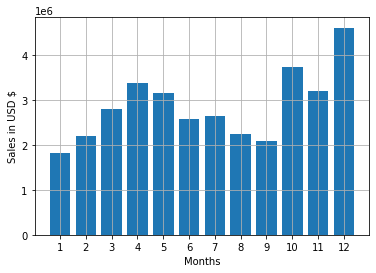

In [23]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months ,results['Sales'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD $")
plt.grid()
plt.show()
# Dimensions : Months
# Measures : Sales 

In [24]:
results.median()

Quantity Ordered      16538.500
Price Each          2711873.695
Sales               2727438.070
dtype: float64



*   According to the bar chart it shows that the best month for sales is December with approximately 4 Billion $

*   And the month with the lowest sales is January with less than 2 Billion $ 

*   Median of sales in the year 2019 is approxiamtly 2.8 Billion $





**Question 2: Which City sold the most products?**







> ▶Adding a City column by splitting the purchase address column



In [25]:

DataFrame['City'] = DataFrame['Purchase Address'].apply(lambda x: x.split(',')[1])
DataFrame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [26]:
citySum = DataFrame.groupby('City').sum()
citySum.head(10)
# Groupping the data frame according to the City column

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06




> ▶ Plotting the results of the city with the largest sales



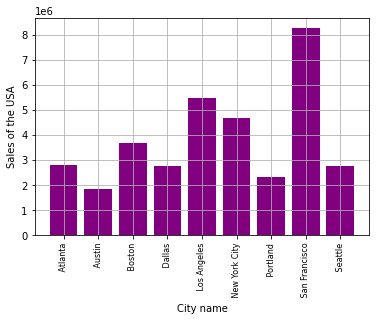

In [27]:
import matplotlib.pyplot as plt
# Grouping them according to the city so it gives us true consistency 
cities = [city for city, df in DataFrame.groupby('City')]
plt.bar(cities ,citySum['Sales'],color = 'purple')
plt.xticks(cities, rotation = 'vertical',size =8)
plt.ylabel('Sales of the USA')
plt.xlabel('City name')
plt.grid()
plt.show()

In [28]:
citySum.median()

Quantity Ordered      16730.00
Price Each          2779908.20
Month                104941.00
Sales               2795498.58
dtype: float64



*   As shown in the above plot, SanFrancisco is the city with the largest sales
*   And the city with the lowest sales is Austin
*   The city with an average sale is Atlanta





**Question 3: What time is the best for purchasing products?**



> ▶Converting the Order Date to dateTime


In [29]:
DataFrame['Order Date'] = pd.to_datetime(DataFrame['Order Date'])
DataFrame.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
dtype: object

In [30]:
DataFrame.head()
#We can now see the order date and timing

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta




> ▶Adding an Hour and minutes column 



In [31]:
DataFrame['Hour'] = DataFrame['Order Date'].dt.hour
DataFrame['Minutes'] = DataFrame['Order Date'].dt.minute
DataFrame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38




> ▶Visualizing the plot of the best timing



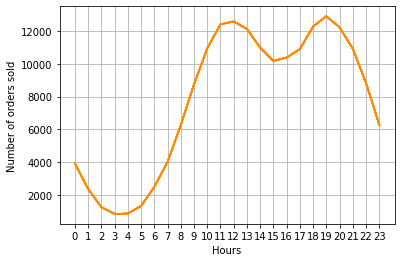

In [32]:
hours = [hour for hour, df in DataFrame.groupby('Hour')]
# grouping and counting the rows by hour
plt.plot(hours,DataFrame.groupby(['Hour']).count(), color = 'darkorange')
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders sold')
plt.grid()
plt.show()

In [33]:
DataFrame['Order Date'] = DataFrame['Order Date'].dt.year.astype('str') + '-' + DataFrame['Order Date'].dt.month.astype('str') + '-01'
DataFrame['Order Date'] = pd.to_datetime(DataFrame['Order Date'])

In [34]:

#groupby date and sum the sales
DateFrame= DataFrame.groupby('Order Date').Sales.sum().reset_index()
DateFrame


,Order Date,Sales
0,2019-01-01,1.813586e+06
1,2019-02-01,2.202022e+06
2,2019-03-01,2.807100e+06
3,2019-04-01,3.390670e+06
4,2019-05-01,3.152607e+06
5,2019-06-01,2.577802e+06
6,2019-07-01,2.647776e+06
7,2019-08-01,2.244468e+06
8,2019-09-01,2.097560e+06
9,2019-10-01,3.736727e+06




*   The plot shows 2 peaks in a 24 hour
*   Around 11 am to 12 pm 
*   And around 6 to 7 pm are the best timings for purchasing products







**Question 4: What are the most purchased products together?**





> ▶Displaying the duplicated order ID's



In [35]:
DataFrame = DataFrame[DataFrame['Order ID'].duplicated(keep = False)]
DataFrame.head(10)
#we can see the products that are most sold together from the order ID's that are duplicated and sent to the same address 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
16,295681,Google Phone,1,600.00,2019-12-01,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-01,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-01,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,37
19,295681,Wired Headphones,1,11.99,2019-12-01,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-01,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-01,"175 1st St, New York City, NY 10001",12,23.90,New York City,14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-01,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin,12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-01,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin,12,27
66,295726,iPhone,1,700.00,2019-12-01,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston,14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-01,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston,14,49


In [36]:
DataFrame['Month'] = DataFrame['Order Date'].apply(lambda x: x.strftime('%Y-%m'))


In [37]:
Trend = DataFrame.groupby('Month').sum()['Sales'].reset_index()


In [38]:
DataFrame.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
Sales                      float64
City                        object
Hour                         int64
Minutes                      int64
dtype: object

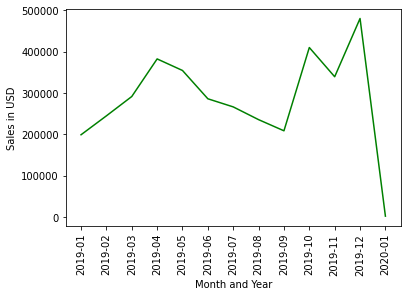

In [39]:

plt.plot(Trend['Month'],Trend['Sales'], color = 'green')
plt.xticks(rotation = 'vertical',size = 10)
plt.xlabel('Month and Year')
plt.ylabel('Sales in USD')
plt.show()

**Question 5: What Product is sold the most?**



> ▶Plotting the chart according to the price and products



In [40]:
products = DataFrame.groupby('Product')
Quantity = products.sum()['Quantity Ordered']
products = [product for product, df in products ]

In [41]:
prices = DataFrame.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

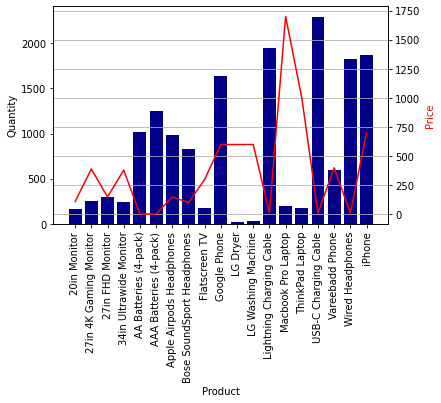

In [42]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(products,Quantity,color = 'darkblue')
ax2.plot(products,prices,color = 'red')
ax.set_xlabel('Product')
ax.set_ylabel('Quantity') 
ax.set_xticklabels(products, rotation ='vertical',size = 10 )
ax2.set_ylabel('Price',color = 'red')
plt.grid()
plt.show()



*   Most sold product is the USB-C Charging cable and the Lightning Charging Cable
*   You can notice from the chart above that the products that are sold the most are low in price and are mostly cables



# **Machine Learning Algorithm and Train & Test**



---






In [45]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 

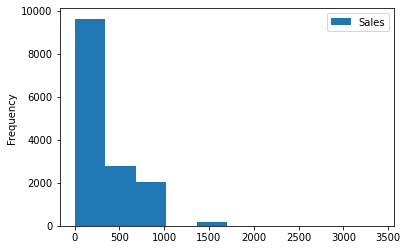

In [46]:
DataFrame.plot.hist(y='Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


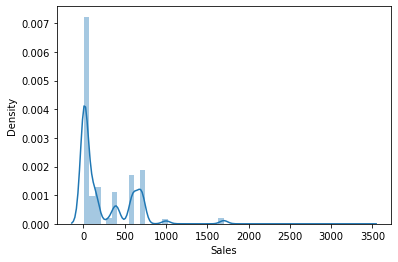

In [47]:
sns.distplot(DataFrame['Sales'])

In [48]:
# Set the data column as an index of the dataframe
DataFrame= DataFrame.set_index('Order Date')
DataFrame


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Minutes
Order Date,,,,,,,,,,
2019-12-01,295681,Google Phone,1,600.00,"79 Elm St, Boston, MA 02215",2019-12,600.00,Boston,12,37
2019-12-01,295681,USB-C Charging Cable,1,11.95,"79 Elm St, Boston, MA 02215",2019-12,11.95,Boston,12,37
2019-12-01,295681,Bose SoundSport Headphones,1,99.99,"79 Elm St, Boston, MA 02215",2019-12,99.99,Boston,12,37
2019-12-01,295681,Wired Headphones,1,11.99,"79 Elm St, Boston, MA 02215",2019-12,11.99,Boston,12,37
2019-12-01,295698,Vareebadd Phone,1,400.00,"175 1st St, New York City, NY 10001",2019-12,400.00,New York City,14,32
...,...,...,...,...,...,...,...,...,...,...
2019-11-01,295526,27in FHD Monitor,1,149.99,"550 Park St, Dallas, TX 75001",2019-11,149.99,Dallas,11,26
2019-11-01,295534,Google Phone,1,600.00,"22 Pine St, Boston, MA 02215",2019-11,600.00,Boston,19,21
2019-11-01,295534,USB-C Charging Cable,1,11.95,"22 Pine St, Boston, MA 02215",2019-11,11.95,Boston,19,21


In [49]:
DataFrame.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                  int64
Minutes               int64
dtype: object

In [50]:
# Resample to weekly frequency, aggregating with mean
columns = ['Sales','Quantity Ordered','Price Each']
df_monthly_mean =DataFrame[columns].resample('M').mean()
df_monthly_mean.head(20)

,Sales,Quantity Ordered,Price Each
Order Date,,,
2019-01-31,248.546888,1.075000,247.023650
2019-02-28,263.054548,1.073118,261.208366
2019-03-31,245.755067,1.074199,244.783128
2019-04-30,260.729591,1.069530,258.975215
2019-05-31,250.337338,1.086864,249.599202
2019-06-30,260.180400,1.067334,259.461419
2019-07-31,255.089904,1.086207,254.203113
2019-08-31,250.718296,1.085197,249.911044
2019-09-30,253.849342,1.081608,252.762278


In [51]:
print(DateFrame.shape)
print(df_monthly_mean.shape)

(13, 2)
(13, 3)


In [52]:
DataFrame.mean()

Order ID                   inf
Quantity Ordered      1.079391
Price Each          251.494155
Sales               252.541437
Hour                 14.456755
Minutes              29.635265
dtype: float64

(array([737060., 737091., 737119., 737150., 737180., 737211.]),
 <a list of 6 Text major ticklabel objects>)

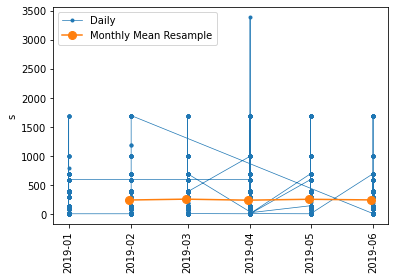

In [53]:
start, end = '2019-01-01', '2019-06-01'
fig, ax = plt.subplots()
ax.plot(DataFrame.loc[start:end, 'Sales'],
marker='.', linestyle='-', linewidth=0.70, label='Daily')
ax.plot(df_monthly_mean.loc[start:end,'Sales'],
marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('s')
ax.legend();
plt.xticks(rotation =90)
# plotting for period of time using subplots function

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt 

In [55]:
DataFrame

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Minutes
Order Date,,,,,,,,,,
2019-12-01,295681,Google Phone,1,600.00,"79 Elm St, Boston, MA 02215",2019-12,600.00,Boston,12,37
2019-12-01,295681,USB-C Charging Cable,1,11.95,"79 Elm St, Boston, MA 02215",2019-12,11.95,Boston,12,37
2019-12-01,295681,Bose SoundSport Headphones,1,99.99,"79 Elm St, Boston, MA 02215",2019-12,99.99,Boston,12,37
2019-12-01,295681,Wired Headphones,1,11.99,"79 Elm St, Boston, MA 02215",2019-12,11.99,Boston,12,37
2019-12-01,295698,Vareebadd Phone,1,400.00,"175 1st St, New York City, NY 10001",2019-12,400.00,New York City,14,32
...,...,...,...,...,...,...,...,...,...,...
2019-11-01,295526,27in FHD Monitor,1,149.99,"550 Park St, Dallas, TX 75001",2019-11,149.99,Dallas,11,26
2019-11-01,295534,Google Phone,1,600.00,"22 Pine St, Boston, MA 02215",2019-11,600.00,Boston,19,21
2019-11-01,295534,USB-C Charging Cable,1,11.95,"22 Pine St, Boston, MA 02215",2019-11,11.95,Boston,19,21


In [56]:
#Finding the average sales for each month 
DataframeMonthlyResample = DataFrame[(DataFrame.columns).tolist()].resample('M').mean()
DataframeMonthlyResample

,Quantity Ordered,Price Each,Sales,Hour,Minutes
Order Date,,,,,
2019-01-31,1.075000,247.023650,248.546888,14.552500,29.077500
2019-02-28,1.073118,261.208366,263.054548,14.788172,30.383871
2019-03-31,1.074199,244.783128,245.755067,14.625632,29.967116
2019-04-30,1.069530,258.975215,260.729591,14.436264,29.789366
2019-05-31,1.086864,249.599202,250.337338,14.551554,29.388418
2019-06-30,1.067334,259.461419,260.180400,14.315742,30.118289
2019-07-31,1.086207,254.203113,255.089904,14.722222,28.303640
2019-08-31,1.085197,249.911044,250.718296,14.493078,30.197018
2019-09-30,1.081608,252.762278,253.849342,15.079172,29.447016


In [57]:
#Taking The quantity, the price as input and the sales as output 
X = DataframeMonthlyResample.iloc[:,0:2].values
print(X)
Y = DataframeMonthlyResample.iloc[:,2:3].values
print(Y)

[[  1.075      247.02365   ]
 [  1.07311828 261.20836559]
 [  1.07419899 244.78312816]
 [  1.06952965 258.97521472]
 [  1.08686441 249.59920198]
 [  1.06733394 259.46141947]
 [  1.0862069  254.20311303]
 [  1.08519702 249.91104366]
 [  1.0816078  252.76227771]
 [  1.06990881 248.66566565]
 [  1.10230548 243.56795389]
 [  1.08018868 250.73668239]
 [  1.16666667 279.98166667]]
[[248.5468875 ]
 [263.05454839]
 [245.75506745]
 [260.729591  ]
 [250.33733757]
 [260.18040036]
 [255.08990421]
 [250.71829606]
 [253.84934227]
 [249.28953799]
 [244.47199568]
 [251.77023585]
 [282.47333333]]


In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 2)
(3, 2)
(10, 1)
(3, 1)


In [59]:
LRegressor = LinearRegression()
LRegressor.fit(x_train,y_train)

LinearRegression()

In [60]:
Y_pred = LRegressor.predict(x_test)

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_pred,y_test))
print(mean_absolute_error(Y_pred,y_test))

0.16204978031111414
0.3917312305361615


In [62]:
X[:,1]

array([247.02365   , 261.20836559, 244.78312816, 258.97521472,
       249.59920198, 259.46141947, 254.20311303, 249.91104366,
       252.76227771, 248.66566565, 243.56795389, 250.73668239,
       279.98166667])

In [63]:
Y

array([[248.5468875 ],
       [263.05454839],
       [245.75506745],
       [260.729591  ],
       [250.33733757],
       [260.18040036],
       [255.08990421],
       [250.71829606],
       [253.84934227],
       [249.28953799],
       [244.47199568],
       [251.77023585],
       [282.47333333]])

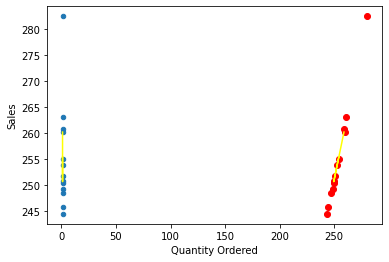

In [64]:
#Scatter plot with points representing the relationship between the quantity ordered and the sales 
DataframeMonthlyResample.plot.scatter(x='Quantity Ordered',y='Sales')
plt.scatter(X[:,1],Y,color='red') #Monthly Price on the left and monthly quantity ordered on the right
plt.plot(x_test,Y_pred,color='yellow') 
#yellow line on the left represent the relationship between monthly price and sales
#yellow line on the right represent the relationship between monthly quantity ordered and sales
plt.show()

In [65]:
DataFrame.mode()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Minutes
0,160873,USB-C Charging Cable,1,11.95,"197 Center St, San Francisco, CA 94016",2019-12,11.95,San Francisco,19,13


In [66]:
print("mean : ",DataFrame['Sales'].mean())
print("Mode ",DataFrame['Sales'].mode())
print("Median of values in Phenols ",DataFrame['Sales'].median())

mean :  252.54143695819258
Mode  0    11.95
dtype: float64
Median of values in Phenols  99.99


In [67]:
LRegressor.score(x_test,Y_pred)

1.0